In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [108]:
df = pd.read_csv("../Data/student-por.csv")
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Undersøker korrelasjonen mellom variablene:

In [109]:
#pd.plotting.scatter_matrix(df, figsize=(20,20))
#plt.show()

Sjekker om dataene inneholder tomme 

In [110]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [111]:
categorical_cols=["sex", "school", "address", "Pstatus", "Mjob", "Fjob", "guardian", "famsize", "reason", "schoolsup", "famsup", "activities", "paid", "internet", "nursery", "higher", "romantic"]
#famrel, fedu, medu, traveltime, studytime, failures(maks 4), freetime, goout, Walc, Dalc, health, (G1, G2)
df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, prefix_sep="_", drop_first = True)


In [112]:
#Model 1
X_1 = df.drop(["G3", ], axis=1)

#Model 2
X_2 = df[["G1", "G2"]]

#Model 3
#X_3 = []

#Response
Y = df["G3"]

X_1_train, X_1_test, X_2_train, X_2_test, Y_train, Y_test = train_test_split(X_1, X_2, Y, test_size = 0.20)

X_1_train.columns.values

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'sex_M', 'school_MS', 'address_U',
       'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'guardian_mother', 'guardian_other', 'famsize_LE3',
       'reason_home', 'reason_other', 'reason_reputation',
       'schoolsup_yes', 'famsup_yes', 'activities_yes', 'paid_yes',
       'internet_yes', 'nursery_yes', 'higher_yes', 'romantic_yes'],
      dtype=object)

In [113]:
# Model 1

params = {"eta": [0.1, 0.01], "max_depth": [1, 2, 3, 4, 5]}
xgb_model = xgb.XGBRegressor() #Alternativ: XGBClassifier
GsCV = GridSearchCV(xgb_model, params, verbose=0, scoring="neg_mean_squared_error", cv=5)
GsCV.fit(X_1_train, Y_train)

model1 = GsCV.best_estimator_
print(GsCV.best_score_) #Negative MSE
print(GsCV.best_params_)

model1.feature_importances_

-1.8739311380409749
{'eta': 0.1, 'max_depth': 1}


array([0.        , 0.        , 0.        , 0.        , 0.01491278,
       0.03277287, 0.        , 0.        , 0.01433054, 0.02209019,
       0.        , 0.01476389, 0.01630947, 0.16442142, 0.69380957,
       0.01583066, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01075856, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [114]:
# Model 2

params = {"eta": [0.1, 0.01], "max_depth": [1, 2, 3], "num_parallel_tree": [1, 2, 3]}
xgb_model = xgb.XGBRegressor() #Alternativ: XGBClassifier
GsCV = GridSearchCV(xgb_model, params, verbose=0, scoring="neg_mean_squared_error", cv=5)
GsCV.fit(X_2_train, Y_train)
model2 = GsCV.best_estimator_ #Negative MSE

print(GsCV.best_score_)
print(GsCV.best_params_)

prediction_2 =model.predict(X_2_test)

model2.feature_importances_

-1.866121961133485
{'eta': 0.1, 'max_depth': 1, 'num_parallel_tree': 2}


array([0.1751462 , 0.82485384], dtype=float32)

In [115]:
model1.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)>

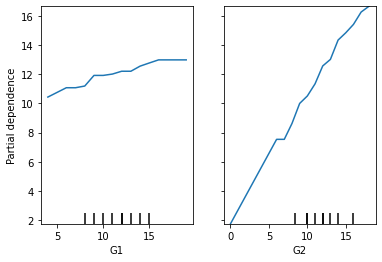

In [116]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(model2, X_2_test, X_2_test.columns.values)

In [120]:
model1.score(X_1_test, Y_test)

0.8802421673277196

In [121]:
model2.score(X_2_test, Y_test)

0.8790864563905065

In [124]:
np.where(model1.feature_importances_ != 0, X_1_train.columns.values, None)

array([None, None, None, None, 'studytime', 'failures', None, None,
       'goout', 'Dalc', None, 'health', 'absences', 'G1', 'G2', 'sex_M',
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, 'reason_other', None, None, None, None,
       None, None, None, None, None], dtype=object)